In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import uniform

# Load preprocessed data
train = pd.read_csv("/kaggle/input/preprocess-travel/train_processed.csv")
test  = pd.read_csv("/kaggle/input/preprocess-travel/test_processed.csv")

TARGET = "spend_category"
IDCOL = "trip_id"

In [2]:
X = train.drop(columns=[TARGET, IDCOL])
y = train[TARGET]
X_test = test.drop(columns=[IDCOL])

# Split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [3]:

# Hyperparameter search
param_dist = {
    "C": uniform(0.1, 10),
    "gamma": uniform(0.001, 0.1),
}

svm = SVC(kernel="rbf", class_weight="balanced", probability=True)

search = RandomizedSearchCV(
    svm,
    param_distributions=param_dist,
    n_iter=20,
    scoring="f1_macro",
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

In [4]:

search.fit(X_train, y_train)

best_svm = search.best_estimator_
print("Best params:", search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'C': 1.9182496720710063, 'gamma': 0.019340450985343382}



 Improved SVM Validation Macro-F1: 0.6386

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      1249
         1.0       0.66      0.53      0.59       982
         2.0       0.39      0.65      0.49       293

    accuracy                           0.70      2524
   macro avg       0.63      0.67      0.64      2524
weighted avg       0.72      0.70      0.70      2524



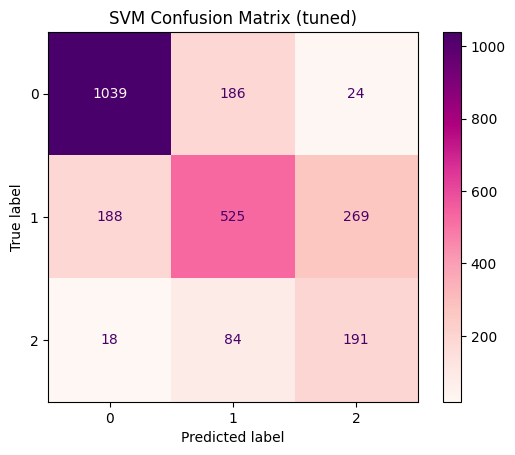

In [5]:

# Validation results
val_preds = best_svm.predict(X_val)
f1 = f1_score(y_val, val_preds, average="macro")
print("\n Improved SVM Validation Macro-F1:", round(f1, 4))

print("\nClassification Report:")
print(classification_report(y_val, val_preds))

cm = confusion_matrix(y_val, val_preds)
ConfusionMatrixDisplay(cm).plot(cmap="RdPu")
plt.title("SVM Confusion Matrix (tuned)")
plt.show()

In [6]:
test_preds = best_svm.predict(X_test)

submission_svm = pd.DataFrame({
    IDCOL: test[IDCOL],
    TARGET: test_preds
})

svm_save_path = "/kaggle/working/submission.csv"
submission_svm.to_csv(svm_save_path, index=False)

print("\n Tuned SVM submission saved:", svm_save_path)
submission_svm.head()


 Tuned SVM submission saved: /kaggle/working/submission.csv


,trip_id,spend_category
0,tour_id8gzpck76,2.0
1,tour_idow1zxkou,0.0
2,tour_idue7esfqz,0.0
3,tour_idnj3mjzpb,0.0
4,tour_ida3us5yk2,0.0
